### 5시간동안 시행착오 겪은 내용정리 
1. array를 정리할땐 np.append를 쓰자.
   
2. linear model에서 **scale을** 신경쓰는 이유가 있었다. gradient descent 시간 + 성능에 영향을 크게 미친다.
3. array가 중요하다. shape도 생각하고 shape를 어떻게 다뤄야할지도 계속 연습해야한다.
4. gradient descent는 theta를 구하기 위한 식일 뿐이다. gradient 식을 가지고 gradient descent plot을 그릴 순 없다. 
5. gradient descent를 그리기 위해서는 먼저 최적의 Weight을 찾아야한다. 그 다음 mse를 계산하는 해서 plot을 만든다.
6. contour plot에서 z는 x*y 크기의 행렬이어야 한다. 격자별로 mse를 올려놓고 비슷한 부분을 등고선으로 연결시키는 개념이다.

### 배운 매소드
* array.size : vector 개수를 알려줌  axb= size

* array.flatten  : 행렬을 그냥 하나의 array로 만듬(scalar로 만드는건가? 방향이 없으니까)
* np.append(쌓일 array, 쌓을 array, 쌓을 위치(axis=0 row, axis-1 column))
* min(list) : list 최솟값 구하기
* list.index(조건) => 위치 반환
* array는 slice를 사용하면 원하는데로 조절하기 편함



In [1]:
### 등고선으로 gradient descent 그려보기

from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loans_df = pd.read_csv('D:\git_local_repository\yangoos57\DA\data/loans.csv')

# total_credit_limit
# total_credit_utilized

### ch9에서 활용하는 column만 추출
intro_data = loans_df[['interest_rate','verified_income','debt_to_income', 'total_credit_limit', 'total_credit_utilized', 'public_record_bankrupt','term','issue_month','inquiries_last_12m']]

# credit_util 항목 만들기
intro_data['credit_util'] = np.round(intro_data['total_credit_utilized']/intro_data['total_credit_limit'],2)

### 이름변경
intro_data.columns = ['interest_rate', 'income_ver', 'debt_to_income', '1','2', 'bankruptcy', 'term', 'issued','credit_checks','credit_util']

# loans_df.loc[1]
intro_data.drop(columns=['1','2'],inplace=True)


intro_data.dropna(inplace=True) # 결측값 있는 row 제거
intro_data.reset_index(drop=True,inplace=True) # index 


<ipython-input-2-917e98e50449>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intro_data['credit_util'] = np.round(intro_data['total_credit_utilized']/intro_data['total_credit_limit'],2)
<ipython-input-2-917e98e50449>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intro_data.drop(columns=['1','2'],inplace=True)
<ipython-input-2-917e98e50449>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [3]:
# Preprocessing 필수!
from sklearn.preprocessing import StandardScaler
x_b = intro_data[['term','credit_util']]
y = intro_data[['interest_rate']]
scaler = StandardScaler()
x_b = pd.DataFrame(scaler.fit_transform(x_b)) # (9974,2)

# 굳이 안구해도 되는데 GD는 어떻게 x_0을 구하는지 궁금했음
x_b.insert(loc=0, column='x_0',value=1) # x_0 구하기 위한 열추가 (9974,3) 

**Equation 1** : Gradient vector of the cost function

 $\nabla_{\theta}MSE(\theta) = \frac{2}{m}X^T(X\theta-y)$

**Equation 2** : Gradient Descent Step  

 $\theta^{(next\;step)}= \theta - \eta\nabla_{\theta}MSE(\theta)$

**Equation 3** : Mean Squared Error

  $ MSE(X,h_{\theta}) = \frac{1}{m}\sum_{i=1}^{m}{(\theta^Tx^{(i)}-y^{(i)})^2} $

In [81]:
# theta = np.random.randn(2,1)  # random initialization
theta = np.array([[15],[2],[1.5]]) # (3,1)

eta = 0.1  # learning rate
n_iterations = 1 # 반복횟수
m = 9974 # instance 개수

theta_np =np.empty((1,3))
mse_list =[]
for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta).values - y.values) # equation 1 행렬 크기 생각하기 (3,9974) * [(9974,3)*(3,1) - (9974,1)]
    theta = theta - eta * gradients
    theta_np = np.append(theta_np, theta.values.T,axis=0,) # equation 2 
    mse = (1/m)*np.sum(np.square(x_b.dot(theta).values - y.values)) # equation 3 (9974,3)*(3,1) - (9974,1)
    mse_list.append(mse)
    # print(gradients)

num = mse_list.index(min(mse_list))

print(f'최적 w : {theta_np[1:][num]} , {num+1}') 



최적 w : [14.48431141  1.97005666  1.47014554] , 1


$\frac{\delta}{\delta\theta_j}MSE(\theta)$  = $\frac{2}{m}\sum_{i=1}^{m}{(\theta^Tx^{(i)}-y^{(i)})x_j^{(i)}}$


<img src='data/74759a1309f51c240d0f7a0ff7d39d87.webp' style='width : 300px; height :200px'>


1. $\large x_j^i$ = 행렬 $(i,j)$의 값 
2. $\large x_1^2$ = 행렬 $(2,1)$
3. $(\theta^Tx^{(i)}-y^{(i)})$ = (1,3) *(3,1) = (1,1)
4. $(\theta^Tx^{(i)}-y^{(i)})x_j^{(i)}$ = (1,3) * (3,1) * (1,1)
5.  $\theta^TX-Y = X\theta-Y$

### 포기.. 백터 공부하고 다시 이해해보자

In [93]:
# x_b_mini = x_b.query('index <20')
# y_mini =  y.query('index <20')
x_b_mini = x_b.copy()
y_mini = y.copy()
b =[]
theta = np.array([[15],[2],[1.5]]) # (3,1)
n = len(y_mini)
for i in range(n) :
    a = (theta.T.dot(x_b_mini.iloc[i]) -y_mini.iloc[i].values) * x_b_mini.iloc[i,2]
    b.append(a[0])


print((2/n) * np.sum(b), gradients)

0.29854458901230235             0
x_0  5.156886
0    0.299433
1    0.298545


In [5]:
n_r = 3 # number of range
x_lin = np.linspace(-theta_np[1:][num][1]*n_r ,theta_np[1:][num][1]*n_r, 100) # plot을 그리기 위해 최적 w를 기준으로 범위를 넓히자
y_lin = np.linspace(-theta_np[1:][num][2]*n_r ,theta_np[1:][num][2]*n_r, 100) # plot을 그리기 위해 최적 w를 기준으로 범위를 넓히자
z_lin = np.zeros((x_lin.size,y_lin.size)) # (200,200) 격자 만들기
drop_x_1 = x_b.drop(columns='x_0')
for i, value1 in enumerate(x_lin):
    for j, value2 in enumerate(y_lin):
        w_temp = np.array((value1,value2)).reshape(2,1)        
        z_lin[i, j] = (1/m)*np.sum(np.square(drop_x_1.dot(w_temp).values - y.values)) ## 격자에 맞는 MSE 채우기

Text(0, 0.5, 'w1')

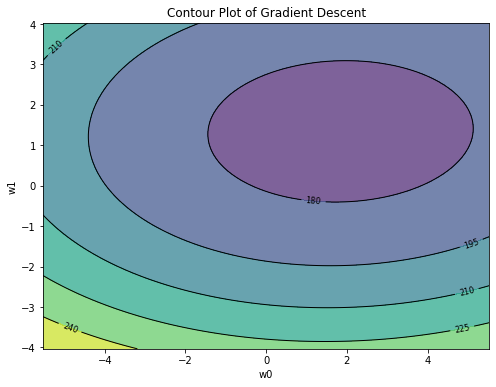

In [6]:
# plt.contourf(x_lin,y_lin,z_lin)
plt.figure(figsize=(8,6))
plt.contourf(x_lin,y_lin,z_lin,alpha=0.7) # 색만 칠하기
CS = plt.contour(x_lin,y_lin,z_lin,linewidths=1,colors='black') # 등고선만 그리기
plt.clabel(CS, inline=1, fontsize=8,fmt='%d') # 등고선에 text 넣기
plt.title("Contour Plot of Gradient Descent")
plt.xlabel("w0")
plt.ylabel("w1")

